In [1]:
import matplotlib.pyplot as plt
%matplotlib inline
from matplotlib import rcParams
# figure size in inches
rcParams['figure.figsize'] = 12.,8.

import seaborn as sns
import pandas as pd
import wandb

pd.set_option('display.max_columns', None)



In [2]:
api = wandb.Api()
entity, project = "invariance-learners", "neurips2023"  # set to your entity and project 
runs = api.runs(entity + "/" + project)

In [3]:
summary_list, config_list, name_list, tags, ids, states = [], [], [], [], [], []
for run in runs: 
    # .summary contains the output keys/values for metrics like accuracy.
    #  We call ._json_dict to omit large files 
    summary_list.append(run.summary._json_dict)

    # .config contains the hyperparameters.
    #  We remove special values that start with _.
    config_list.append(
        {k: v for k,v in run.config.items()
         if not k.startswith('_')})

    # .name is the human-readable name of the run.
    name_list.append(run.name)

    tags.append(run.tags)

    ids.append(run.id)

    states.append(run.state)

runs_df = pd.DataFrame({
    "summary": summary_list,
    "config": config_list,
    "name": name_list,
    "tags": tags,
    "id": ids,
    "state": states
    })

runs_df

,summary,config,name,tags,id,state
0,"{'_wandb': {'runtime': 505}, '_timestamp': 167...","{'α': 1, 'β': 10, 'seed': 2, 'model': {'X_give...",hopeful-yogurt-347,"[angle_sweep, general_affine]",uv7n5gvf,finished
1,"{'best_val_z_kld': 101.93466186523438, 'val/lo...","{'α': 1, 'β': 10, 'seed': 0, 'model': {'X_give...",ethereal-bird-346,"[angle_sweep, general_affine]",2cvy6tkr,finished
2,"{'best_val_z_kld': 102.8647689819336, 'val_rec...","{'α': 1, 'β': 10, 'seed': 1, 'model': {'X_give...",youthful-wave-343,"[angle_sweep, general_affine]",3tz39f01,finished
3,"{'_step': 7500, '_runtime': 501, 'val/loss': -...","{'α': 1, 'β': 10, 'seed': 1, 'model': {'X_give...",helpful-cosmos-344,"[angle_sweep, general_affine]",2k44fdvl,finished
4,"{'best_val_z_kld': 102.6212921142578, 'val_rec...","{'α': 1, 'β': 10, 'seed': 2, 'model': {'X_give...",dazzling-galaxy-345,"[angle_sweep, general_affine]",201liy1d,finished
...,...,...,...,...,...,...
340,"{'train/z_kld': 526.81494140625, 'best_val_z_k...","{'α': 0.01, 'β': 10, 'seed': 1, 'model': {'bou...",grateful-sun-5,[angle_sweep],gwiipzi6,finished
341,"{'train/ll': -782.53271484375, 'train/elbo': -...","{'α': 0.01, 'β': 10, 'seed': 0, 'model': {'bou...",fluent-capybara-4,[angle_sweep],3inf1q5s,finished
342,"{'learing_rate': 0.00010000000474974512, 'α': ...","{'α': 0.01, 'β': 10, 'seed': 0, 'model': {'bou...",noble-valley-3,[test],12c84lhk,finished
343,"{'_wandb': {'runtime': 557}, '_runtime': 554, ...","{'α': 1, 'β': 10, 'seed': 0, 'model': {'bounds...",icy-dust-2,[test],de7swj7f,finished


In [4]:
df_expanded = runs_df.join(pd.json_normalize(runs_df['summary'], record_prefix='summary.').add_prefix('summary.')).drop('summary', axis='columns')
df_expanded = df_expanded.join(pd.json_normalize(runs_df['config'], record_prefix='config').add_prefix('config.')).drop('config', axis='columns')

df_expanded.columns

Index(['name', 'tags', 'id', 'state', 'summary._timestamp',
       'summary.train/z_kld', 'summary.best_val_z_kld', 'summary.β',
       'summary.train/ll', 'summary.best_val_ll', 'summary.train/elbo',
       'summary.train/loss', 'summary.learing_rate', 'summary.best_val_loss',
       'summary.α', 'summary.val/ll', 'summary.val/elbo', 'summary.val/z_kld',
       'summary.best_val_step', 'summary._step', 'summary._runtime',
       'summary.val/loss', 'summary.best_val_elbo', 'summary._wandb.runtime',
       'summary.prior_samples.path', 'summary.prior_samples.size',
       'summary.prior_samples._type', 'summary.prior_samples.width',
       'summary.prior_samples.format', 'summary.prior_samples.height',
       'summary.prior_samples.sha256', 'summary.best_prior_samples._type',
       'summary.best_prior_samples.width', 'summary.best_prior_samples.format',
       'summary.best_prior_samples.height',
       'summary.best_prior_samples.sha256', 'summary.best_prior_samples.path',
       'su

In [5]:
df_expanded

,name,tags,id,state,summary._timestamp,summary.train/z_kld,summary.best_val_z_kld,summary.β,summary.train/ll,summary.best_val_ll,summary.train/elbo,summary.train/loss,summary.learing_rate,summary.best_val_loss,summary.α,summary.val/ll,summary.val/elbo,summary.val/z_kld,summary.best_val_step,summary._step,summary._runtime,summary.val/loss,summary.best_val_elbo,summary._wandb.runtime,summary.prior_samples.path,summary.prior_samples.size,summary.prior_samples._type,summary.prior_samples.width,summary.prior_samples.format,summary.prior_samples.height,summary.prior_samples.sha256,summary.best_prior_samples._type,summary.best_prior_samples.width,summary.best_prior_samples.format,summary.best_prior_samples.height,summary.best_prior_samples.sha256,summary.best_prior_samples.path,summary.best_prior_samples.size,summary.val_reconstructions.size,summary.val_reconstructions._type,summary.val_reconstructions.width,summary.val_reconstructions.format,summary.val_reconstructions.height,summary.val_reconstructions.sha256,summary.val_reconstructions.path,summary.val/η_kld,summary.best_val_η_kld,summary.train/η_kld,config.α,config.β,config.seed,config.dataset,config.pp_eval,config.pp_train,config.val_split,config.batch_size,config.eval_every,config.model_name,config.optim_name,config.total_steps,config.train_split,config.learning_rate,config.lr_schedule_name,config.β_schedule_name,config.repeat_after_batch,config.data_rotation_angle,config.shuffle_buffer_size,config.model.X_given_Z.hidden_dims,config.model.Z_given_X.hidden_dims,config.model.latent_dim,config.optim.weight_decay,config.lr_schedule.end_value,config.lr_schedule.peak_value,config.lr_schedule.decay_steps,config.lr_schedule.warmup_steps,config.β_schedule.alpha,config.β_schedule.decay_steps,config.α_schedule_name,config.model.bounds,config.model.Eta_given_X.base.hidden_dims,config.model.Eta_given_X.bijector.num_bins,config.model.Eta_given_X.bijector.num_layers,config.model.Eta_given_X.bijector.hidden_dims,config.model.Eta_given_Z.base.hidden_dims,config.model.Eta_given_Z.bijector.num_bins,config.model.Eta_given_Z.bijector.num_layers,config.model.Eta_given_Z.bijector.hidden_dims,config.model.Xhat_given_Z.hidden_dims,config.α_schedule.alpha,config.α_schedule.decay_steps,config.model.Eta.base.hidden_dims,config.model.Eta.bijector.num_bins,config.model.Eta.bijector.num_layers,config.model.Eta.bijector.hidden_dims
0,hopeful-yogurt-347,"[angle_sweep, general_affine]",uv7n5gvf,finished,1.677509e+09,96.399849,99.174843,1.0,1062.775635,1084.388062,966.375549,-966.375549,0.0001,-985.213257,1.0,1084.388062,985.213257,99.174843,7500.0,7500.0,504.0,-985.213257,985.213257,505,media/images/prior_samples_7500_a60ee450c455b1...,123091.0,image-file,19200.0,png,800.0,a60ee450c455b1743d70cabb2259a2daf6acc726819653...,image-file,19200.0,png,800.0,a60ee450c455b1743d70cabb2259a2daf6acc726819653...,media/images/best_prior_samples_summary_a60ee4...,123091.0,214629.0,image-file,19200.0,png,1600.0,a8b91fedca696e4d1d809dcc5fec281e4bc83623db8b4e...,media/images/val_reconstructions_7500_a8b91fed...,NaN,NaN,NaN,1.00,10,2,MNIST,"value_range(-1, 1)|random_rotate(-90, 90, fill...","value_range(-1, 1)|random_rotate(-90, 90, fill...",train[:10000],512,500,VAE,adamw,7501,train[10000:],0.0001,warmup_cosine_decay_schedule,cosine_decay_schedule,True,90,50000,"[256, 128, 64]","[64, 128, 256]",128,0.0001,0.0001,0.001,7501,1000,0.1,7501,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,ethereal-bird-346,"[angle_sweep, general_affine]",2cvy6tkr,finished,1.677509e+09,99.082245,101.934662,1.0,1027.590942,1052.156006,928.508545,-928.508545,0.0001,-950.221252,1.0,1052.156006,950.221252,101.934662,7500.0,7500.0,504.0,-950.221252,950.221252,506,media/images/prior_samples_7500_a8e418c14edf47...,124439.0,image-file,19200.0,png,800.0,a8e418c14edf478a87a2cbe176d989724494658aa844b0...,image-file,19200.0,png,800.0,a8e418c14edf478a87a2cbe176d989724494658aa844b0...,media/images/best_prior_samples_summary_a8e418...,124439.0,

In [6]:
# take only completed runs
df_filtered = df_expanded[df_expanded['state'] == 'finished']

# take only runs with a certain tag
df_filtered = df_filtered[df_filtered['tags'].apply(lambda x: 'angle_sweep' in x)]

# take onlt runs with the config.data_rotation_angle column
df_filtered = df_filtered[df_filtered['config.data_rotation_angle'].notna()]

# create new column to show if there is a tag called "rotation_only" or a tag called "general_affine"
df_filtered['transformation_type'] = df_filtered['tags'].apply(lambda x: 'rotation_only' if 'rotation_only' in x else ('general_affine' if 'general_affine' in x else 'unknown'))

# convert config.data_rotation_angle to an int
df_filtered['config.data_rotation_angle'] = df_filtered['config.data_rotation_angle'].astype(int)

df_filtered

,name,tags,id,state,summary._timestamp,summary.train/z_kld,summary.best_val_z_kld,summary.β,summary.train/ll,summary.best_val_ll,summary.train/elbo,summary.train/loss,summary.learing_rate,summary.best_val_loss,summary.α,summary.val/ll,summary.val/elbo,summary.val/z_kld,summary.best_val_step,summary._step,summary._runtime,summary.val/loss,summary.best_val_elbo,summary._wandb.runtime,summary.prior_samples.path,summary.prior_samples.size,summary.prior_samples._type,summary.prior_samples.width,summary.prior_samples.format,summary.prior_samples.height,summary.prior_samples.sha256,summary.best_prior_samples._type,summary.best_prior_samples.width,summary.best_prior_samples.format,summary.best_prior_samples.height,summary.best_prior_samples.sha256,summary.best_prior_samples.path,summary.best_prior_samples.size,summary.val_reconstructions.size,summary.val_reconstructions._type,summary.val_reconstructions.width,summary.val_reconstructions.format,summary.val_reconstructions.height,summary.val_reconstructions.sha256,summary.val_reconstructions.path,summary.val/η_kld,summary.best_val_η_kld,summary.train/η_kld,config.α,config.β,config.seed,config.dataset,config.pp_eval,config.pp_train,config.val_split,config.batch_size,config.eval_every,config.model_name,config.optim_name,config.total_steps,config.train_split,config.learning_rate,config.lr_schedule_name,config.β_schedule_name,config.repeat_after_batch,config.data_rotation_angle,config.shuffle_buffer_size,config.model.X_given_Z.hidden_dims,config.model.Z_given_X.hidden_dims,config.model.latent_dim,config.optim.weight_decay,config.lr_schedule.end_value,config.lr_schedule.peak_value,config.lr_schedule.decay_steps,config.lr_schedule.warmup_steps,config.β_schedule.alpha,config.β_schedule.decay_steps,config.α_schedule_name,config.model.bounds,config.model.Eta_given_X.base.hidden_dims,config.model.Eta_given_X.bijector.num_bins,config.model.Eta_given_X.bijector.num_layers,config.model.Eta_given_X.bijector.hidden_dims,config.model.Eta_given_Z.base.hidden_dims,config.model.Eta_given_Z.bijector.num_bins,config.model.Eta_given_Z.bijector.num_layers,config.model.Eta_given_Z.bijector.hidden_dims,config.model.Xhat_given_Z.hidden_dims,config.α_schedule.alpha,config.α_schedule.decay_steps,config.model.Eta.base.hidden_dims,config.model.Eta.bijector.num_bins,config.model.Eta.bijector.num_layers,config.model.Eta.bijector.hidden_dims,transformation_type
0,hopeful-yogurt-347,"[angle_sweep, general_affine]",uv7n5gvf,finished,1.677509e+09,96.399849,99.174843,1.0,1062.775635,1084.388062,966.375549,-966.375549,0.0001,-985.213257,1.0,1084.388062,985.213257,99.174843,7500.0,7500.0,504.0,-985.213257,985.213257,505,media/images/prior_samples_7500_a60ee450c455b1...,123091.0,image-file,19200.0,png,800.0,a60ee450c455b1743d70cabb2259a2daf6acc726819653...,image-file,19200.0,png,800.0,a60ee450c455b1743d70cabb2259a2daf6acc726819653...,media/images/best_prior_samples_summary_a60ee4...,123091.0,214629.0,image-file,19200.0,png,1600.0,a8b91fedca696e4d1d809dcc5fec281e4bc83623db8b4e...,media/images/val_reconstructions_7500_a8b91fed...,NaN,NaN,NaN,1.00,10,2,MNIST,"value_range(-1, 1)|random_rotate(-90, 90, fill...","value_range(-1, 1)|random_rotate(-90, 90, fill...",train[:10000],512,500,VAE,adamw,7501,train[10000:],0.0001,warmup_cosine_decay_schedule,cosine_decay_schedule,True,90,50000,"[256, 128, 64]","[64, 128, 256]",128,0.0001,0.0001,0.001,7501,1000,0.1,7501,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,general_affine
1,ethereal-bird-346,"[angle_sweep, general_affine]",2cvy6tkr,finished,1.677509e+09,99.082245,101.934662,1.0,1027.590942,1052.156006,928.508545,-928.508545,0.0001,-950.221252,1.0,1052.156006,950.221252,101.934662,7500.0,7500.0,504.0,-950.221252,950.221252,506,media/images/prior_samples_7500_a8e418c14edf47...,124439.0,image-file,19200.0,png,800.0,a8e418c14edf478a87a2cbe176d989724494658aa844b0...,image-file,19200.0,png,800.0,a8e418c14edf478a87a2cbe176d989724494658aa844b0...,media/images/best_prior_

<AxesSubplot:xlabel='config.data_rotation_angle', ylabel='summary.best_val_ll'>

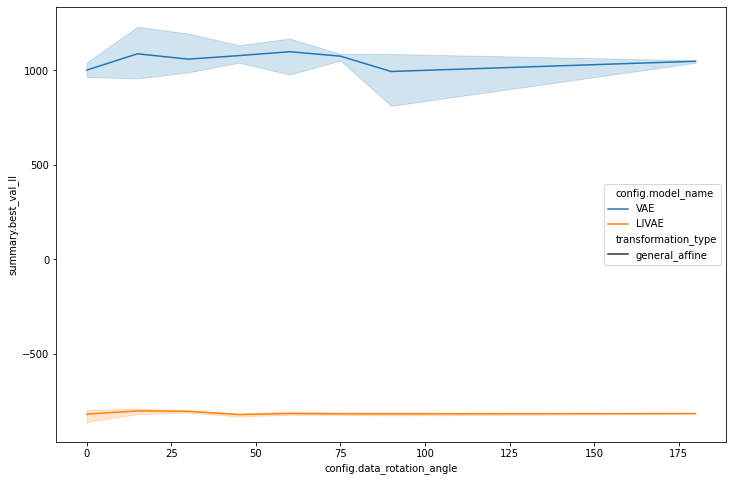

In [7]:
# compare VAE and LIVAE, under general affine transformation
plot_df = df_filtered[df_filtered['config.model_name'].isin(['VAE', 'LIVAE'])]
plot_df = plot_df[plot_df['transformation_type'] == 'general_affine']

sns.lineplot(x="config.data_rotation_angle", y="summary.best_val_ll",
             hue="config.model_name", style="transformation_type",
             data=plot_df)

<AxesSubplot:xlabel='config.data_rotation_angle', ylabel='summary.best_val_ll'>

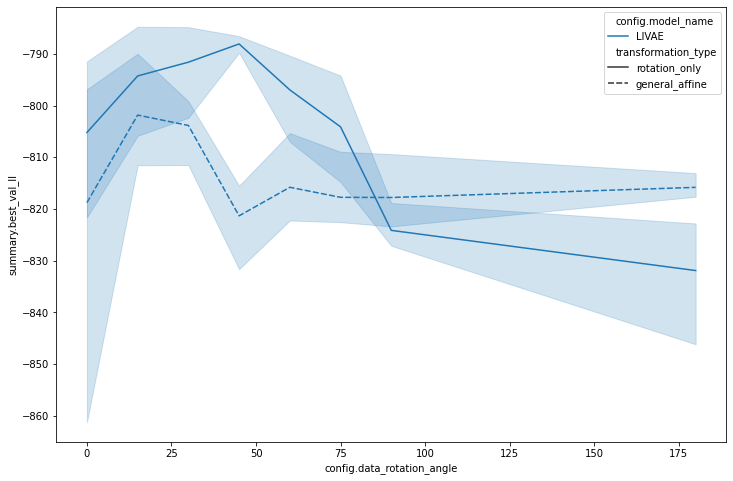

In [8]:
# compare LIVAE under general affine transformation and under rotation only
plot_df = df_filtered[df_filtered['config.model_name'].isin(['LIVAE'])]
plot_df = plot_df[plot_df['transformation_type'].isin(['general_affine', 'rotation_only'])]

sns.lineplot(x="config.data_rotation_angle", y="summary.best_val_ll",
             hue="config.model_name", style="transformation_type",
             data=plot_df)

<AxesSubplot:xlabel='config.data_rotation_angle', ylabel='summary.best_val_ll'>

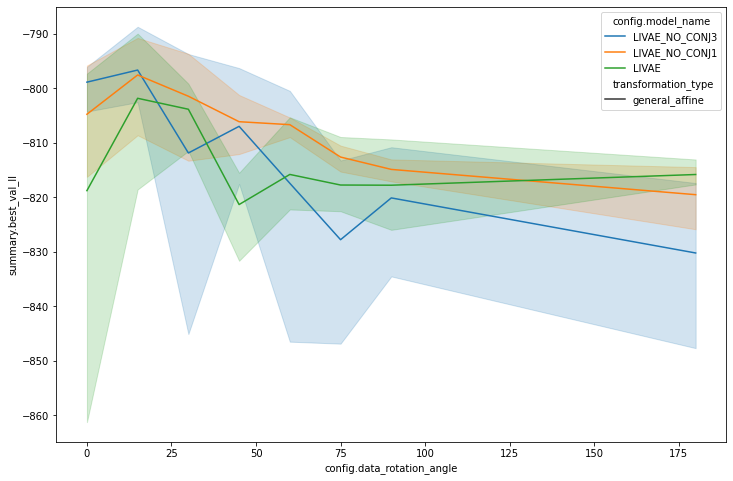

In [9]:
# compare LIVAE, LIVAE_NO_CONJ1, and LIVAE_NO_CONJ3 under general affine transformation
plot_df = df_filtered[df_filtered['config.model_name'].isin(['LIVAE', 'LIVAE_NO_CONJ1', 'LIVAE_NO_CONJ3'])]
plot_df = plot_df[plot_df['transformation_type'] == 'general_affine']

sns.lineplot(x="config.data_rotation_angle", y="summary.best_val_ll",
             hue="config.model_name", style="transformation_type",
             data=plot_df)